In [158]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import time
from selenium import webdriver
import sys
from tqdm.notebook import tqdm

url = input('네이버 스마트 스토어 URL 입력:')
driver = webdriver.Chrome('c:/py_data/chromedriver.exe')
driver.get(url)
time.sleep(2)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

네이버 스마트 스토어 URL 입력:https://search.shopping.naver.com/catalog/19930897400?query=%EB%8B%A4%EC%9D%B4%EC%8A%A8%20%EC%97%90%EC%96%B4%EB%9E%A9


<html lang="ko"><head><link href="https://static.nid.naver.com" rel="preconnect"/><link href="https://lcs.naver.com" rel="preconnect"/><link href="http://shopping.phinf.naver.net" rel="preconnect"/><link href="https://ssl.pstatic.net" rel="preconnect"/><link href="https://shopping-phinf.pstatic.net" rel="preconnect"/><link href="https://volts.shopping.naver.com" rel="preconnect"/><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><title>스마트팩토리 다이슨 에어랩 거치대 H : 네이버 쇼핑</title><link href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-210528-193256/img/favicon.ico" rel="shortcut icon"/><meta content="스마트팩토리 다이슨 에어랩 거치대 H : 네이버 쇼핑" property="og:title"/><meta content="품목 : 거치대, 적용모델 : 다이슨에어랩" property="og:description"/><meta content="https://shopping-phinf.pstatic.net/main_1993089/19930897400.20200101133702.jpg?type=f160" property="og:image"/><meta content="https://search.shopping.naver.com/catalog/19930897400?query=%EB%8B%A4%EC%9D%B4%EC%8A%A8%20%EC%97%90%EC%96%B
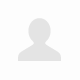
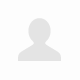

In [3]:
soup

In [56]:
menu_area = soup.find('div', class_='floatingTab_detail_tab__2T3U7').find_all('li')
menu_area

[<li class="floatingTab_on__299Bi"><a aria-selected="true" data-nclick="N=a:tab*s.prc" href="#" role="button"><strong>판매처</strong><em>7</em></a></li>,
 <li class=""><a aria-selected="false" data-nclick="N=a:tab*s." href="#" role="button"><strong>제품정보</strong></a></li>,
 <li class=""><a aria-selected="false" data-nclick="N=a:tab*s.ugc" href="#" role="button"><strong>블로그리뷰</strong></a></li>,
 <li class=""><a aria-selected="false" data-nclick="N=a:tab*s.srev" href="#" role="button"><strong>쇼핑몰리뷰</strong><em>1,337</em></a></li>,
 <li class=""><a aria-selected="false" data-nclick="N=a:tab*s.aitems" href="#" role="button"><strong>AiTEMS추천</strong></a></li>]

In [57]:
re.sub('[^가-힣]',' ',menu_area[3].text)

'쇼핑몰리뷰     '

In [58]:
# snb > ul > li:nth-child(1) > a
# snb > ul > li:nth-child(2) > a
# snb > ul > li:nth-child(3) > a
# snb > ul > li:nth-child(4) > a
# snb > ul > li:nth-child(5) > a

In [59]:
review_num = int(menu_area[3].find('em').text.replace(',',''))

In [159]:
menu_area = soup.find('div', class_='floatingTab_detail_tab__2T3U7').find_all('li')
for i in range(len(menu_area)):
    menu = re.sub('[^ㄱ-ㅣ가-힣 ]','',menu_area[i].text)
    if menu == '쇼핑몰리뷰':
        driver.find_element_by_css_selector('#snb > ul > li:nth-child('+str(i+1)+') > a').click()
        review_num = int(menu_area[i].find('em').text.replace(",",""))
        
        break

In [ ]:
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(2)
#...
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(10)
#section_review > div.pagination_pagination__2M9a4 > a.pagination_next__3ycRH
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(4)
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(11)
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(3)

In [106]:
next_btn = [' a:nth-child(1)',' a:nth-child(2)',' a:nth-child(3)',' a:nth-child(4)',' a:nth-child(5)',
' a:nth-child(6)',' a:nth-child(7)',' a:nth-child(8)',' a:nth-child(9)',
' a:nth-child(10)',' a.pagination_next__3ycRH']

next_btn_path = '#section_review > div.pagination_pagination__2M9a4 >'

In [107]:
next_btn_1 = [' a:nth-child(2)',' a:nth-child(3)',' a:nth-child(4)',' a:nth-child(5)',
' a:nth-child(6)',' a:nth-child(7)',' a:nth-child(8)',' a:nth-child(9)',
' a:nth-child(10)',' a:nth-child(11)',' a.pagination_next__3ycRH']

next_btn_path = '#section_review > div.pagination_pagination__2M9a4 >'

In [125]:
next_btn = [' a:nth-child(1)']

## 코드 정리

In [177]:
# import 해줄 것들
import pandas as pd
from bs4 import BeautifulSoup
import re
import time
from selenium import webdriver
import sys
from tqdm.notebook import tqdm
from selenium.webdriver.common.keys import Keys

# 변수
next_btn = [' a:nth-child(1)',' a:nth-child(2)',' a:nth-child(3)',' a:nth-child(4)',' a:nth-child(5)',
' a:nth-child(6)',' a:nth-child(7)',' a:nth-child(8)',' a:nth-child(9)',
' a:nth-child(10)',' a.pagination_next__3ycRH']

next_btn_path = '#section_review > div.pagination_pagination__2M9a4 >'

next_btn_1 = [' a:nth-child(2)',' a:nth-child(3)',' a:nth-child(4)',' a:nth-child(5)',
' a:nth-child(6)',' a:nth-child(7)',' a:nth-child(8)',' a:nth-child(9)',
' a:nth-child(10)',' a:nth-child(11)',' a.pagination_next__3ycRH']

cont_lst = []
star_lst = []

# 사이트 접속
url = input('네이버 스마트 스토어 URL 입력:')
driver = webdriver.Chrome('c:/py_data/chromedriver.exe')
driver.get(url)
time.sleep(2)

# 쇼핑몰 리뷰 누르기
menu_area = soup.find('div', class_='floatingTab_detail_tab__2T3U7').find_all('li')
for i in range(len(menu_area)):
    menu = re.sub('[^ㄱ-ㅣ가-힣 ]','',menu_area[i].text)
    if menu == '쇼핑몰리뷰':
        driver.find_element_by_css_selector('#snb > ul > li:nth-child('+str(i-1)+') > a').click()   # 페이지별로 바꿔줘야한다.
        review_num = int(menu_area[i].find('em').text.replace(",","")) 
        break

# 페이지 버튼 누르면서 크롤링하기 (1~10페이지)
for next_num in next_btn:
    driver.find_element_by_css_selector(next_btn_path + next_num).click()
    time.sleep(2)
    for i in range(1,21):
        driver.find_element_by_xpath('//*[@id="section_review"]/ul/li['+str(i)+']/div[3]/a').send_keys(Keys.ENTER)
        time.sleep(0.5)
        
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for cont in soup.find_all('p', class_='reviewItems_text__XIsTc'):
        content = re.sub('[^0-9a-zA-Zㄱ-ㅣ가-힣 ]','',cont.text)
        cont_lst.append(content)  
    for star in soup.find_all('span', class_='reviewItems_average__16Ya-'):
        starpoint = star.text.lstrip("평점")
        star_lst.append(starpoint)
        
# 페이지 버튼 누르면서 크롤링하기 (11페이지 이상)
for next_num in next_btn_1:
    driver.find_element_by_css_selector(next_btn_path + next_num).click()
    time.sleep(2)
    try:
        for i in range(1,21):
            driver.find_element_by_xpath('//*[@id="section_review"]/ul/li['+str(i)+']/div[3]/a').send_keys(Keys.ENTER)
            time.sleep(0.5)
    except:
        continue
        
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for cont in soup.find_all('p', class_='reviewItems_text__XIsTc'):
        content = re.sub('[^0-9a-zA-Zㄱ-ㅣ가-힣 ]','',cont.text)
        cont_lst.append(content)  
    for star in soup.find_all('span', class_='reviewItems_average__16Ya-'):
        starpoint = star.text.lstrip("평점")
        star_lst.append(starpoint)

    
        
df = pd.DataFrame({'내용':cont_lst, '별점':star_lst})
df.to_csv('c:/py_data/네이버 쇼핑몰 리뷰 크롤링.csv', encoding='cp949')
df.head()

네이버 스마트 스토어 URL 입력:https://search.shopping.naver.com/catalog/24088482854?query=%EC%9A%B0%ED%8F%AC%EC%8A%A4&NaPm=ct%3Dkpcazkeo%7Cci%3Ddf1cb10ec58030f05558a4b1af8ec9d387283a06%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D55a02ba96b20c29ae4bc411b93707013bb5ad4a9


,내용,별점
0,착용감 쪼리를 신으면 엄지검지발가락 사이에 물집이 생기는 타입이여서 우포스사기전에 ...,5
1,쪼리치곤 가격대가 있는 편이라 구매하기 전에 고민했는 데 막상 착용해보니 돈이 아깝...,4
2,도로위에 침대 마쉬멜로우 구름 이라길래 얼마나 푹신하고 편한지 기대가 너무 컸는...,4
3,여자고 평소 막힌구두255 샌들은 250 운동화는 250255 신는데 나이키는 26...,5
4,소문대로 편한데 살짝 적응이 안되네요 발볼좀 있는 270인데 280이 딱 맞구요 2...,4


## 모범 답안

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver 
import pandas as pd
from tqdm.notebook import tqdm
import time
import re
import sys

url = input("네이버 스마트 스토어 URL 입력:")
driver = webdriver.Chrome("C:/py_data/chromedriver.exe")
driver.get(url)
time.sleep(2)

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

next_btn_path = '#section_review > div.pagination_pagination__2M9a4 >'

next_btn = [' a:nth-child(2)',' a:nth-child(3)',' a:nth-child(4)',' a:nth-child(5)',
' a:nth-child(6)',' a:nth-child(7)',' a:nth-child(8)',' a:nth-child(9)',
' a:nth-child(10)',' a.pagination_next__3ycRH']

menu_area = soup.find('div',class_='floatingTab_detail_tab__2T3U7').find_all("li")
for i in range(len(menu_area)):
    menu = re.sub('[^가-힣]','',menu_area[i].text)
    if menu == '쇼핑몰리뷰':
        driver.find_element_by_css_selector('#snb > ul > li:nth-child('+str(i+1)+') > a').click()
        review_num = int(menu_area[i].find('em').text.replace(",",""))
        break

point_lst=[]
doc_lst=[]
now_page = 0
for page in tqdm(range(review_num//len(soup.find('ul',class_='reviewItems_list_review__1sgcJ').find_all('li'))+1)):
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    review_area = soup.find('ul',class_='reviewItems_list_review__1sgcJ').find_all('li')
     
    # 리뷰 더보기 클릭
    for num in range(1,len(review_area)+1):
        try:
            driver.find_element_by_css_selector('#section_review > ul > li:nth-child('+str(num)+') > div.reviewItems_btn_area__2St26 > a').click()
            time.sleep(0.3)
        except:
            pass
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    review_area = soup.find('ul',class_='reviewItems_list_review__1sgcJ').find_all('li')
    
    for review in review_area:
        point = int(review.find('span',class_='reviewItems_average__16Ya-').text.replace("평점",""))
        point_lst.append(point)
        
        review_txt = review.find('div',class_='reviewItems_review__1eF8A').text
        doc_lst.append(re.sub('[^가-힣 ]','',review_txt).replace("포토리뷰",""))
    
    try:    
        driver.find_element_by_css_selector(next_btn_path+next_btn[now_page]).click()
        time.sleep(1)
    except:
        pass
    
    if next_btn[now_page] == next_btn[-1]:
        now_page = 0
        next_btn = [' a:nth-child(3)',' a:nth-child(4)',' a:nth-child(5)',
                    ' a:nth-child(6)',' a:nth-child(7)',' a:nth-child(8)',' a:nth-child(9)',
                    ' a:nth-child(10)',' a:nth-child(11)'' a.pagination_next__3ycRH']
    else:
        now_page = now_page + 1
driver.close()        
df = pd.DataFrame({'별점':point_lst, '리뷰': doc_lst})
df.to_csv('c:/py_data/네이버 스마트 스토어 상품.csv',encoding="cp949")
print(len(list(doc_lst)),'개의 게시물을 크롤링 하였습니다.')